In [8]:
!pip install yfinance
!pip install cufflinks plotly


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/81.7 kB 262.6 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 409.6 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 458.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=c88d5c38db1444b35f6a34995af17fa06899d9a1303dd28b1c67fef5f84d74a7
  Stored in directory: c:\users\chand\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [9]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import yfinance as yf
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')
cf.set_config_file(offline=True)
import scipy.stats as stats
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as py


In [ ]:
s0= 100 #Spot price
k=100 # strike price
r=0.05 # Risk free rate
t= 1 #Time horizon
vol =0.2 #implied volatilty
sims = 10000
path= 12

In [4]:
def BSM(s0, k, r, t, vol, sims, path):
  d1= (np.log(s0/k) + (r + 0.5 * vol**2) * t) / (vol * np.sqrt(t))
  d2= d1- vol * np.sqrt(t)
  S= np.zeros((sims, path+1))
  dt= t/path
  S[:,0]= s0

  for i in range(path):
    phi = np.random.randn(sims)
    S[:,i+1]= S[:,i] * np.exp((r - 0.5 * vol*vol)*dt+vol*np.sqrt(dt))

  return S

In [6]:
# Example initialization of variables
s0 = 100  # Initial stock price
k = 105   # Strike price
r = 0.05  # Risk-free interest rate
t = 1.0   # Time to maturity (in years)
vol = 0.2 # Volatility of the stock
sims = 10000  # Number of simulations
path = 100  # Number of time steps in each simulation

# Now you can call the BSM function
S = pd.DataFrame(BSM(s0, k, r, t, vol, sims, path))
S.head(10)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
1,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
2,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
3,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
4,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
5,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
6,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
7,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
8,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636
9,100.0,102.050745,104.143545,106.279263,108.458779,110.682992,112.952817,115.269191,117.633068,120.045422,...,634.267117,647.274316,660.548259,674.094417,687.918372,702.025821,716.422578,731.114576,746.107869,761.408636


In [10]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

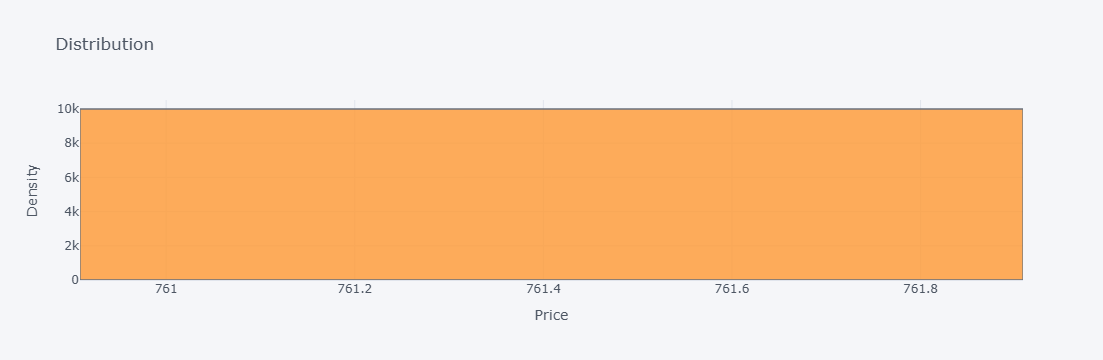

In [11]:
S.iloc[:100000, -1].iplot(kind="histogram", title="Distribution", xTitle="Price", yTitle="Density")


In [12]:
St= S.iloc[:,-1].mean(axis=0)
d1= (np.log(s0/k) + (r + 0.5 * vol**2) * t) / (vol * np.sqrt(t))
d2= d1- vol * np.sqrt(t)
Call= np.maximum(St*norm.cdf(d1)-k*norm.cdf(d2),0)

In [13]:
Call

364.2870540944757

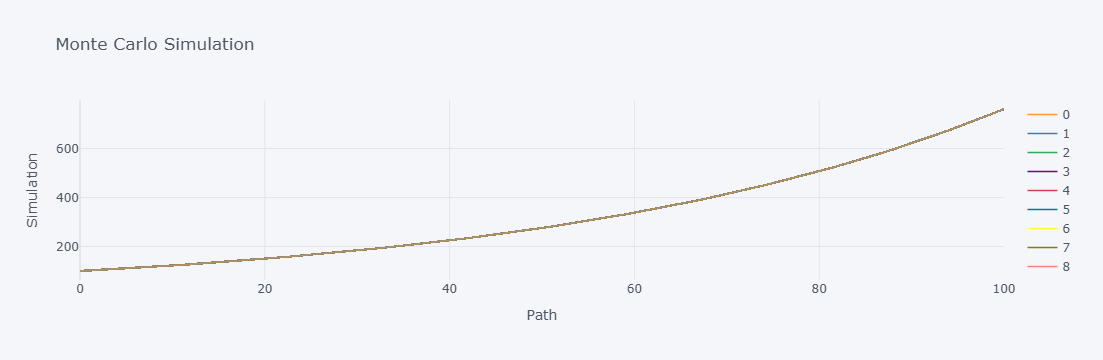

In [14]:
S.iloc[:200,:].T.iplot(title= "Monte Carlo Simulation", xTitle="Path", yTitle= "Simulation")

In [15]:
s0= 24572.65 # spot  price
k=24550 #Strike Price
r=0.065 #Risk free rate
t= 0.008219 #Time horizon
vol =0.11 #implied volatilty


In [16]:
d1= (np.log(s0/k) + (r + 0.5 * vol**2) * t) / (vol * np.sqrt(t))
d2= d1- vol * np.sqrt(t)
Call= np.maximum(s0*norm.cdf(d1)-k*norm.cdf(d2),0)
print(Call)

109.31866097526472


In [17]:
def BSM(s0, k, r, t, vol):
  d1= (np.log(s0/k) + (r + 0.5 * vol**2) * t) / (vol * np.sqrt(t))
  d2= d1- vol * np.sqrt(t)
  c= np.maximum(s0*norm.cdf(d1)-k*norm.cdf(d2),0)
  return(c) 

In [18]:
Call= BSM(s0, k, r, t, vol)
print(Call)

109.31866097526472
